In [30]:
# %autosave 1
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

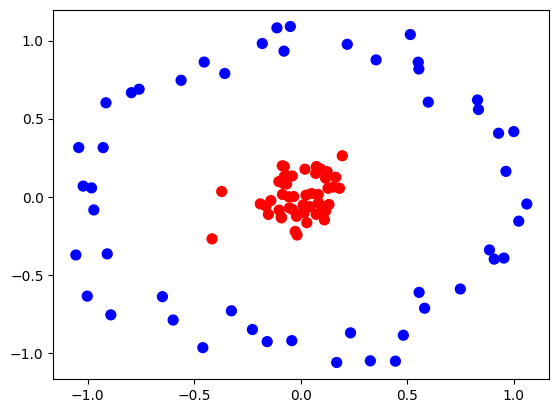

In [2]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [4]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7

In [6]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\This pc\AppData\Local\Temp\ipykernel_1964\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


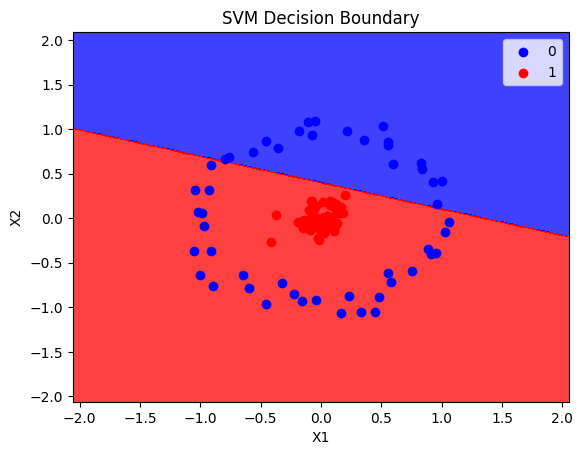

In [7]:
plot_decision_boundary(X, y, classifier)

In [8]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

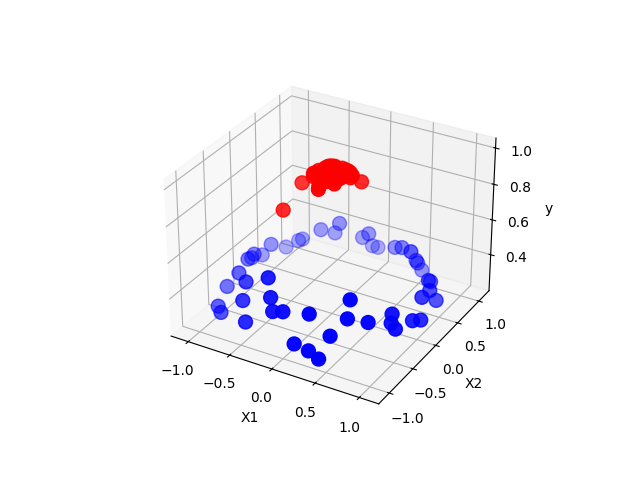

In [21]:
plot_3d_plot(X,y)

In [10]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [11]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\This pc\AppData\Local\Temp\ipykernel_1964\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


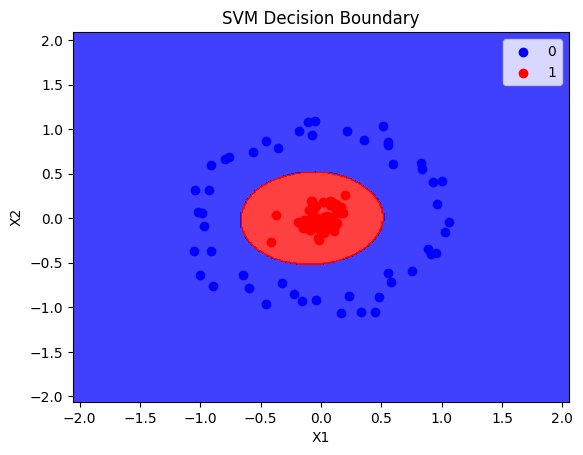

In [12]:
plot_decision_boundary(X, y, rbf_classifier)

In [13]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\This pc\AppData\Local\Temp\ipykernel_1964\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


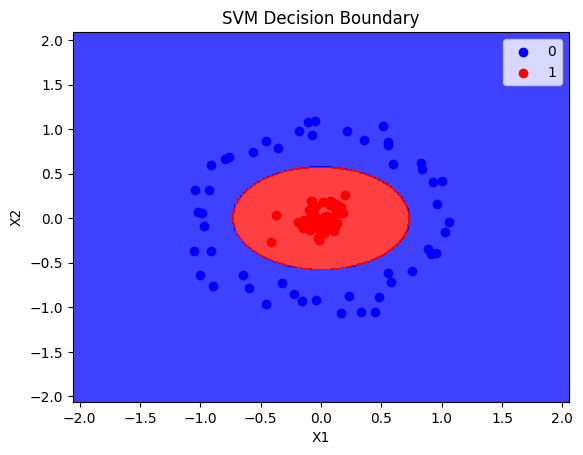

In [15]:
plot_decision_boundary(X, y, poly_classifier)

In [16]:
X

array([[ 1.65171892e-01,  1.24743170e-01],
       [ 4.45234861e-01, -1.05201951e+00],
       [ 9.29801854e-02,  1.78430051e-01],
       [ 7.31022005e-02, -1.12511449e-01],
       [ 2.02094561e-02,  1.76642258e-01],
       [-3.79380711e-02, -8.14723255e-02],
       [-3.56482028e-01,  7.88759115e-01],
       [-5.27039794e-02, -7.09737270e-02],
       [ 9.54874686e-01, -3.92242166e-01],
       [ 1.06240480e+00, -4.63688100e-02],
       [ 2.50469949e-02,  1.02943329e-02],
       [-1.00252246e+00, -6.35823201e-01],
       [-9.82369667e-01,  5.67701123e-02],
       [-3.25295369e-01, -7.29714968e-01],
       [ 8.24911642e-02,  1.44887635e-02],
       [ 1.95550870e-01,  2.62489894e-01],
       [-9.15418209e-02, -1.28870386e-01],
       [-4.16200298e-01, -2.69265794e-01],
       [-1.70765752e-02, -2.44582614e-01],
       [ 1.28596355e-01,  5.42202759e-02],
       [-9.01027112e-02, -1.34813036e-01],
       [-1.51611334e-01, -1.12655867e-01],
       [ 5.55344673e-01,  8.17745860e-01],
       [ 9.

In [17]:
np.exp(-(X**2)).sum(1)

array([1.95764662, 1.15081125, 1.96005614, 1.98209128, 1.96887095,
       1.99194598, 1.41745768, 1.99220154, 1.25920336, 1.32130444,
       1.99926688, 1.03348898, 1.37774643, 1.48673392, 1.99300841,
       1.89590092, 1.97518468, 1.77101229, 1.94164188, 1.98066344,
       1.97390397, 1.96466502, 1.24698573, 1.29012544, 1.3128741 ,
       1.99159004, 1.34746361, 1.98639472, 1.98899996, 1.95921681,
       1.98247032, 1.97998465, 1.95740589, 1.97814451, 1.22989054,
       1.20726998, 1.96598729, 1.19845823, 1.31368973, 1.97198996,
       1.42150152, 1.97743987, 1.32862371, 1.12966874, 1.97026232,
       1.99165281, 1.24840261, 1.95789491, 1.98417763, 1.98001648,
       1.99698116, 1.34594446, 1.96267545, 1.21329424, 1.98091242,
       1.97279804, 1.01639783, 1.87030746, 1.17293995, 1.97289042,
       1.38194769, 1.97237103, 1.95403302, 1.96426752, 1.43586462,
       1.39122431, 1.30262093, 1.27547738, 1.42670975, 1.33931688,
       1.99247672, 1.99408901, 1.10726088, 1.18487961, 1.23043

In [18]:
X_new=np.exp(-(X**2))

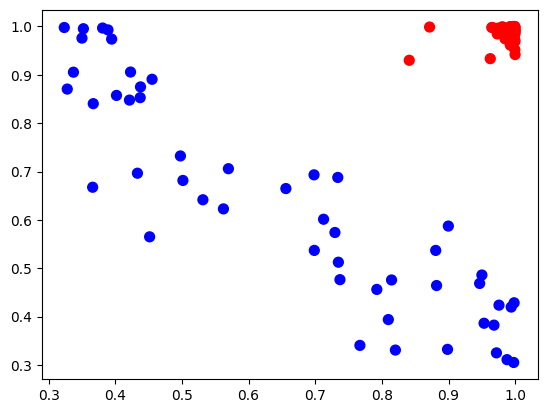

In [19]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')